In [8]:
import pandas as pd
import numpy as np
import matplotlib

#reading the csv
paths_data = pd.read_csv("Paths_Data.csv") 

paths_data.head(10)

,_id,report_id,vehicle_type,vehicle_movement,plate_state,created_at_local,created_at_epoch,address,latitude,longitude
0,1,21645,Other,standing,PA,2019-10-16T08:18:48,1571228328000,"4609 Forbes Ave, Pittsburgh, PA 15213",40.444594,-79.948097
1,2,21734,Private,standing,PA,2019-10-16T17:15:58,1571260558000,"305 Wood St, Pittsburgh, PA 15222",40.438942,-80.001638
2,3,21640,Other,parked,PA,2019-10-16T08:02:54,1571227374000,"4615 Forbes Ave, Pittsburgh, PA 15213",40.444569,-79.947853
3,4,21641,Other,standing,US,2019-10-16T12:16:42,1571242602000,"30 Foster Sq, Pittsburgh, PA 15212",40.451163,-80.007302
4,5,21608,Private,Loading,PA,2019-10-16T08:16:14,1571228174000,"6 PPG Pl, Pittsburgh, PA 15222",40.439702,-80.003641
5,6,21615,Private,Loading,PA,2019-10-16T08:36:16,1571229376000,"6 PPG Pl, Pittsburgh, PA 15222",40.439727,-80.003781
6,7,21586,Private,standing,PA,2019-10-16T07:13:01,1571224381000,"230 3rd Ave, Pittsburgh, PA 15222",40.439240,-80.002425
7,8,21588,Private,Loading,GA,2019-10-16T07:18:39,1571224719000,"230 3rd Ave, Pittsburgh, PA 15222",40.439332,-80.002916
8,9,21590,Private,parked,IN,2019-10-16T07:27:16,1571225236000,"4212 Forbes Ave, Pittsburgh, PA 15213",40.443310,-79.952255
9,10,21592,Other,Loading,PA,2019-10-16T07:30:13,1571225413184,"4515 Forbes Ave, Pittsburgh, PA 15213",40.444320,-79.949267


In [9]:
#Sorting the file by address
address_sort = paths_data.sort_values("address")
address_sort.head(10)

,_id,report_id,vehicle_type,vehicle_movement,plate_state,created_at_local,created_at_epoch,address,latitude,longitude
53,54,21669,Private,parked,CA,2019-10-16T13:05:49,1571245549000,"1 PPG Pl, Pittsburgh, PA 15222",40.439840,-80.003647
93,94,21739,Other,Loading,PA,2019-10-16T17:24:01,1571261041935,"1 PPG Pl, Pittsburgh, PA 15222",40.440055,-80.003656
27,28,21634,Private,standing,PA,2019-10-16T07:17:49,1571224669000,"1 PPG Pl, Pittsburgh, PA 15222",40.439752,-80.003992
28,29,21635,Private,standing,PA,2019-10-16T08:18:43,1571228323000,"1 PPG Pl, Pittsburgh, PA 15222",40.439793,-80.004008
100,101,21751,Ridehail,Loading,PA,2019-10-16T17:32:14,1571261534404,"1 PPG Pl, Pittsburgh, PA 15222",40.440125,-80.003621
92,93,21737,Ridehail,Loading,PA,2019-10-16T17:22:53,1571260973214,"1 PPG Pl, Pittsburgh, PA 15222",40.439995,-80.003684
33,34,21646,Other,standing,PA,2019-10-16T12:26:57,1571243217000,"10 Childrens Way, Pittsburgh, PA 15212",40.452771,-80.007168
45,46,21659,Ridehail,Loading,PA,2019-10-16T12:53:37,1571244817000,"101 S Commons, Pittsburgh, PA 15212",40.450415,-80.004598
54,55,21670,Other,standing,PA,2019-10-16T13:07:16,1571245636219,"101 S Commons, Pittsburgh, PA 15212",40.450343,-80.005086
107,108,21763,Private,standing,PA,2019-10-16T17:40:38,1571262038000,"101 S Commons, Pittsburgh, PA 15212",40.450500,-80.004366


In [10]:
paths_data['zip_code'] = paths_data['address'].str.extract(r'(\b\d{5}\b)')

In [13]:
#making a count to determine which addresses have the highest blocked bike lanes
counts = paths_data['zip_code'].value_counts()
print(counts)

15222    55
15213    51
15212    15
15219     1
Name: zip_code, dtype: int64


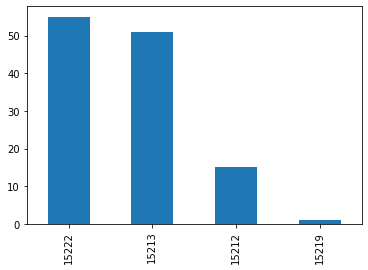

In [14]:
counts.plot.bar()

In [13]:
traffic_data = pd.read_csv("Traffic_Data.csv") 

In [16]:
average_car = traffic_data.sort_values('average_daily_car_traffic')
car_top5 = average_car.head()
car_top5.head()

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
182,183,856876185,77,6.759613e+08,2019-03-22,2019-03-31,23.0,NaN,3,StatTrak,...,-80.012946,40.456612,Central Northside,1.0,22.0,42003220600,1.0,22.0,1.0,1-21
251,474,1271744444,269,9.035092e+08,2020-09-24,2020-10-02,58.0,NaN,#6,StatTrak,...,-79.922844,40.468838,East Liberty,9.0,11.0,42003111300,2.0,11.0,5.0,3-8
307,727,938946316,326,2.249990e+08,2020-11-19,2020-12-02,63.0,NaN,4,StatTrak,...,-79.997312,40.464395,Spring Hill-City View,1.0,24.0,42003262000,1.0,24.0,1.0,1-24
247,470,950865722,265,1.160608e+09,2020-09-16,2020-09-24,77.0,NaN,#2,StatTrak,...,-79.948895,40.465446,Bloomfield,7.0,9.0,42003090300,2.0,9.0,5.0,3-6
258,481,550216999,276,8.605089e+08,2020-07-06,2020-07-15,79.0,NaN,NaN,StatTrak,...,-79.921974,40.470257,Highland Park,7.0,11.0,42003110200,2.0,11.0,5.0,3-9


Text(0.5, 0, 'neighborhood')

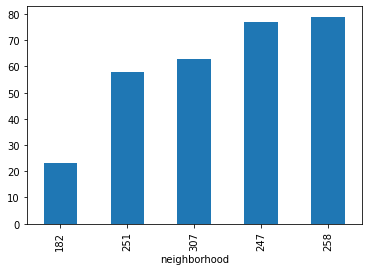

In [15]:
import matplotlib.pyplot as plt

car_top5["average_daily_car_traffic"].plot.bar()

plt.xlabel('neighborhood')